In [1]:
!pip3 install --upgrade pip
!pip3 install Kqlmagic --no-cache-dir --upgrade
!pip3 install nbformat

     |████████████████████████████████| 229 kB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 108 kB 17.5 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 19.8 MB/s eta 0:00:01
     |████████████████████████████████| 94 kB 16.6 MB/s eta 0:00:01
     |████████████████████████████████| 20.6 MB 11.5 MB/s eta 0:00:01    |██████████████▌                 | 9.3 MB 11.5 MB/s eta 0:00:01
     |████████████████████████████████| 293 kB 17.7 MB/s eta 0:00:01
     |████████████████████████████████| 10.3 MB 15.4 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 115 kB 26.5 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 18.0 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 65.6 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 54.4 MB/s eta 0:00:01
     |████████████████████████████████| 45 kB 45.1 MB/s eta 0:00:01
     |████████████████████████████████| 1

     |████████████████████████████████| 55 kB 63.1 MB/s eta 0:00:01
     |████████████████████████████████| 243 kB 23.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 29.0 MB/s eta 0:00:01
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11107 sha256=abe299b08034b6d888a2edf1ad58ed845262b37064949589fdd4870047e59488
  Stored in directory: /tmp/pip-ephem-wheel-cache-2ez4byi6/wheels/0c/09/9e/49e21a6840ef7955b06d47394afef0058f0378c0914e48b8b8
Successfully built pyperclip


In [ ]:
import pandas as pd
pd.options.plotting.backend = "plotly"
import plotly.express as px

Add Kqlmagic to notebook magics

Runtime dependency of PyGObject is missing.
Depends on your Linux distro, you could install it system-wide by something like:
    sudo apt install python3-gi python3-gi-cairo gir1.2-secret-1
If necessary, please refer to PyGObject's doc:
https://pygobject.readthedocs.io/en/latest/getting_started.html
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/msal_extensions/libsecret.py", line 21, in <module>
    import gi  # https://github.com/AzureAD/microsoft-authentication-extensions-for-python/wiki/Encryption-on-Linux
ModuleNotFoundError: No module named 'gi'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


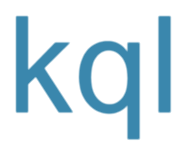

In [3]:
%reload_ext Kqlmagic

In [4]:
%kql loganalytics://code;workspace='1054c1b0-f063-40a7-823e-91dac02fbabc';alias='arturol76-edge-benchmark'

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

Will the MaxUpstreamBatchSize=100 increase the latency of low-rate streams?

# login
```bash
ssh arturo@standard-ds3-v2-edge-1-2-1626596809.westeurope.cloudapp.azure.com -i ../keys/vm-key
```

# deploy test
```bash
az iot edge set-modules -n arturol76-s1-benchmark -d standard-ds3-v2-edge-1-2-1626596809 --content ../tests/test30-low-rate-metrics-1.2.json
```


In [ ]:
!az iot edge set-modules -n arturol76-s1-benchmark -d standard-ds3-v2-edge-1-2-1626596809 --content ../tests/test30-low-rate-metrics-1.2.json

In [17]:
from datetime import datetime, timedelta
from dateutil import parser
testStart=parser.parse("2021-07-28T18:15:00Z")
testStop=parser.parse("2021-07-28T18:20:00Z")

In [18]:
%%kql
    let _start=testStart;
    let _stop=testStop;
    InsightsMetrics 
    | where Origin == "iot.azm.ms" and Namespace == "metricsmodule" 
    | where Name == "edgehub_queue_length" 
    | extend dimensions=parse_json(Tags) 
    | extend device = tostring(dimensions.edge_device) 
    | extend ep = tostring(dimensions.endpoint) 
    | where  ep == "iothub"
    | extend qlen = toint(Val)
    | where qlen > 0 and qlen != 2490317 
    | where TimeGenerated > _start and TimeGenerated < _stop 
    | project TimeGenerated, qlen
    | render timechart title='edgehub_queue_length'

[]

In [19]:
df = _kql_raw_result_.to_dataframe()
df = df.sort_values(by=['TimeGenerated'])

In [20]:
qlenDf = df

In [21]:
%%kql
    let _start=testStart;
    let _stop=testStop;
    let _module_id="source";
    InsightsMetrics
    | where Origin == "iot.azm.ms" and Namespace == "metricsmodule"
    | where Name == "rate"
    | extend dimensions = parse_json(Tags)
    | extend module_id = dimensions.module_id
    | extend channel = dimensions.input_index
    | where module_id == _module_id
    | where TimeGenerated > _start and TimeGenerated < _stop
    | project TimeGenerated, Val

TimeGenerated,Val
2021-07-28 18:15:33+00:00,103.379324135173
2021-07-28 18:15:47+00:00,3.6
2021-07-28 18:15:49+00:00,0
2021-07-28 18:16:02+00:00,99.7401559064561
2021-07-28 18:16:11+00:00,0
2021-07-28 18:16:07+00:00,3.80228136882129
2021-07-28 18:16:51+00:00,0
2021-07-28 18:16:55+00:00,104.158336665334
2021-07-28 18:17:00+00:00,99.619923984797
2021-07-28 18:17:02+00:00,99.619923984797


[{'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 15, 33, tzinfo=tzutc()), 'Val': 103.379324135173},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 15, 47, tzinfo=tzutc()), 'Val': 3.6},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 15, 49, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 16, 2, tzinfo=tzutc()), 'Val': 99.7401559064561},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 16, 11, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 16, 7, tzinfo=tzutc()), 'Val': 3.80228136882129},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 16, 51, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 16, 55, tzinfo=tzutc()), 'Val': 104.158336665334},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 17, tzinfo=tzutc()), 'Val': 99.619923984797},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 17, 2, tzinfo=tzutc()), 'Val': 99.619923984797},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 17, 13, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 17, 37, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 17, 54, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 17, 56, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 18, 1, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 18, 49, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 15, 2, tzinfo=tzutc()), 'Val': 99.8599159495697},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 15, 4, tzinfo=tzutc()), 'Val': 3.19744204636291},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 15, 9, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 15, 6, tzinfo=tzutc()), 'Val': 3.19744204636291},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 15, 13, tzinfo=tzutc()), 'Val': 103.179364127175},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 15, 15, tzinfo=tzutc()), 'Val': 103.179364127175},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 15, 17, tzinfo=tzutc()), 'Val': 103.179364127175},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 15, 20, tzinfo=tzutc()), 'Val': 99.8},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 15, 31, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 15, 29, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 15, 22, tzinfo=tzutc()), 'Val': 99.8},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 15, 24, tzinfo=tzutc()), 'Val': 3.39932013597281},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 15, 27, tzinfo=tzutc()), 'Val': 3.39932013597281},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 15, 38, tzinfo=tzutc()), 'Val': 99.8199639927986},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 15, 40, tzinfo=tzutc()), 'Val': 99.8199639927986},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 15, 53, tzinfo=tzutc()), 'Val': 103.620724144829},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 15, 58, tzinfo=tzutc()), 'Val': 103.620724144829},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 16, 4, tzinfo=tzutc()), 'Val': 3.80228136882129},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 16, 18, tzinfo=tzutc()), 'Val': 99.8},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 16, 20, tzinfo=tzutc()), 'Val': 99.8},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 16, 26, tzinfo=tzutc()), 'Val': 4.19832067173131},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 16, 46, tzinfo=tzutc()), 'Val': 4.19916016796641},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 16, 42, tzinfo=tzutc()), 'Val': 99.9800039992002},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 16, 49, tzinfo=tzutc()), 'Val': 0},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 16, 57, tzinfo=tz

In [22]:
df = _kql_raw_result_.to_dataframe()
df = df.sort_values(by=['TimeGenerated'])

In [23]:
sourceRateDf = df

In [24]:
%%kql
    let _start=testStart;
    let _stop=testStop;
    let _module_id="sink";
    let _input_index="input1";
    InsightsMetrics
    | where Origin == "iot.azm.ms" and Namespace == "metricsmodule"
    | where Name == "rate"
    | extend dimensions = parse_json(Tags)
    | extend module_id = dimensions.module_id
    | extend channel = dimensions.input_index
    | where module_id == _module_id and dimensions.input_index == _input_index
    | where TimeGenerated > _start and TimeGenerated < _stop
    | project TimeGenerated, Val

TimeGenerated,Val
2021-07-28 18:15:33+00:00,39.2
2021-07-28 18:15:47+00:00,61
2021-07-28 18:15:49+00:00,61
2021-07-28 18:16:02+00:00,61
2021-07-28 18:16:11+00:00,38.8310648518815
2021-07-28 18:16:07+00:00,61
2021-07-28 18:16:51+00:00,38.6
2021-07-28 18:16:55+00:00,99.619923984797
2021-07-28 18:17:00+00:00,99.619923984797
2021-07-28 18:17:02+00:00,61.8


[{'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 15, 33, tzinfo=tzutc()), 'Val': 39.2},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 15, 47, tzinfo=tzutc()), 'Val': 61},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 15, 49, tzinfo=tzutc()), 'Val': 61},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 16, 2, tzinfo=tzutc()), 'Val': 61},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 16, 11, tzinfo=tzutc()), 'Val': 38.8310648518815},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 16, 7, tzinfo=tzutc()), 'Val': 61},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 16, 51, tzinfo=tzutc()), 'Val': 38.6},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 16, 55, tzinfo=tzutc()), 'Val': 99.619923984797},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 17, tzinfo=tzutc()), 'Val': 99.619923984797},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 17, 2, tzinfo=tzutc()), 'Val': 61.8},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 17, 13, tzinfo=tzutc()), 'Val': 61.8},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 17, 37, tzinfo=tzutc()), 'Val': 61.8},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 17, 54, tzinfo=tzutc()), 'Val': 61.8},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 17, 56, tzinfo=tzutc()), 'Val': 61.8},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 18, 1, tzinfo=tzutc()), 'Val': 61.8},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 18, 49, tzinfo=tzutc()), 'Val': 61.8},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 15, 11, tzinfo=tzutc()), 'Val': 39.7920415916817},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 15, 35, tzinfo=tzutc()), 'Val': 99.7600959616153},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 15, 44, tzinfo=tzutc()), 'Val': 61},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 15, 42, tzinfo=tzutc()), 'Val': 61},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 15, 51, tzinfo=tzutc()), 'Val': 39.1921615676865},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 15, 55, tzinfo=tzutc()), 'Val': 99.8},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 16, tzinfo=tzutc()), 'Val': 61},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 16, 9, tzinfo=tzutc()), 'Val': 61},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 16, 13, tzinfo=tzutc()), 'Val': 38.8310648518815},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 16, 16, tzinfo=tzutc()), 'Val': 99.9800039992002},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 16, 22, tzinfo=tzutc()), 'Val': 61.2},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 16, 35, tzinfo=tzutc()), 'Val': 99.7800439912018},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 16, 28, tzinfo=tzutc()), 'Val': 61.2},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 16, 31, tzinfo=tzutc()), 'Val': 38.6},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 16, 33, tzinfo=tzutc()), 'Val': 38.6},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 16, 40, tzinfo=tzutc()), 'Val': 99.7800439912018},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 16, 38, tzinfo=tzutc()), 'Val': 99.7800439912018},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 16, 44, tzinfo=tzutc()), 'Val': 61.6},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 16, 53, tzinfo=tzutc()), 'Val': 38.6},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 17, 6, tzinfo=tzutc()), 'Val': 61.8},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 17, 4, tzinfo=tzutc()), 'Val': 61.8},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 17, 11, tzinfo=tzutc()), 'Val': 61.8},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 17, 16, tzinfo=tzutc()), 'Val': 61.8},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 17, 19, tzinfo=tzutc()), 'Val': 61.8},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 17, 8, tzinfo=tzutc()), 'Val': 61.8},
 {'TimeGenerated': datetime.datetime(2021, 7, 28, 18, 17, 21, tzinfo=tzutc()), 'Val': 61.

In [26]:
df = _kql_raw_result_.to_dataframe()
df = df.sort_values(by=['TimeGenerated'])

In [27]:
sinkRateDf = df

In [28]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=1, shared_xaxes=True,
                    vertical_spacing=0.02)

fig.add_trace( 
    go.Line(x=sourceRateDf['TimeGenerated'], y=sourceRateDf['Val']), row=1, col=1
)

fig.add_trace( 
    go.Line(x=sinkRateDf['TimeGenerated'], y=sourceRateDf['Val']), row=2, col=1
)

fig.add_trace( 
    go.Line(x=qlenDf['TimeGenerated'], y=sourceRateDf['Val']), row=3, col=1
)


fig.update_layout(title_text="Side By Side Subplots")
fig.show()